##### Copyright 2018 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# DQN C51/레인보우

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/agents/tutorials/9_c51_tutorial"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/agents/tutorials/9_c51_tutorial.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/agents/tutorials/9_c51_tutorial.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/agents/tutorials/9_c51_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

## 소개

이 예는 TF-Agents 라이브러리를 사용하여 Cartpole 환경에서 [Categorical DQN(C51)](https://arxiv.org/pdf/1707.06887.pdf) 에이전트를 훈련하는 방법을 보여줍니다.

![카트 폴 환경](https://github.com/tensorflow/agents/blob/master/docs/tutorials/images/cartpole.png?raw=1)

전제 조건으로 [DQN 튜토리얼](https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb)을 살펴보아야 합니다. 이 튜토리얼에서는 DQN 튜토리얼에 익숙하다고 가정합니다. 여기서는 주로 DQN과 C51의 차이점에 중점을 둡니다.


## 설정


tf-agents를 아직 설치하지 않은 경우 다음을 실행합니다.

In [2]:
!sudo apt-get install -y xvfb ffmpeg
!pip install -q 'gym==0.10.11'
!pip install -q 'imageio==2.4.0'
!pip install -q PILLOW
!pip install -q 'pyglet==1.3.2'
!pip install -q pyvirtualdisplay
!pip install -q tf-agents

The following packages were automatically installed and are no longer required:
  dconf-gsettings-backend dconf-service dkms freeglut3 freeglut3-dev
  glib-networking glib-networking-common glib-networking-services
  gsettings-desktop-schemas libcairo-gobject2 libcolord2 libdconf1
  libegl1-mesa libepoxy0 libglu1-mesa libglu1-mesa-dev libgtk-3-0
  libgtk-3-common libice-dev libjansson4 libjson-glib-1.0-0
  libjson-glib-1.0-common libproxy1v5 librest-0.7-0 libsm-dev
  libsoup-gnome2.4-1 libsoup2.4-1 libxi-dev libxmu-dev libxmu-headers
  libxnvctrl0 libxt-dev linux-gcp-headers-5.0.0-1026
  linux-headers-5.0.0-1026-gcp linux-image-5.0.0-1026-gcp
  linux-modules-5.0.0-1026-gcp pkg-config policykit-1-gnome python3-xkit
  screen-resolution-extra xserver-xorg-core-hwe-18.04
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver libaacs0 libass9 libavc1394-0 libavcodec57 libavdevice57
  libavfilter6 libavformat57 libavresample3 libavutil

The following NEW packages will be installed:
  ffmpeg i965-va-driver libaacs0 libass9 libavc1394-0 libavcodec57
  libavdevice57 libavfilter6 libavformat57 libavresample3 libavutil55
  libbdplus0 libbluray2 libbs2b0 libcaca0 libcdio-cdda2 libcdio-paranoia2
  libcdio17 libchromaprint1 libcrystalhd3 libdc1394-22 libfftw3-double3
  libflite1 libgme0 libgsm1 libiec61883-0 libjack-jackd2-0 libllvm10
  libmp3lame0 libmpg123-0 libmysofa0 libnorm1 libnuma1 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpgm-5.2-0 libpostproc54
  libraw1394-11 librubberband2 libsamplerate0 libsdl2-2.0-0 libshine3
  libsnappy1v5 libsndio6.1 libsodium23 libsoxr0 libspeex1 libssh-gcrypt-4
  libswresample2 libswscale4 libtheora0 libtwolame0 libva-drm2 libva-x11-2
  libva2 libvorbisfile3 libvpx5 libwavpack1 libwebpmux3 libx264-152
  libx265-146 libxss1 libxvidcore4 libzmq5 libzvbi-common libzvbi0
  mesa-va-drivers va-driver-all xvfb
The following packages will be upgraded:
  libdrm-amdgpu1 libdrm-co

Get:3 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-dev amd64 2.4.101-2~18.04.1 [126 kB]
1% [3 libdrm-dev 12.3 kB/126 kB 10%]

Get:4 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-intel1 amd64 2.4.101-2~18.04.1 [60.0 kB]
Get:5 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-radeon1 amd64 2.4.101-2~18.04.1 [21.7 kB]
Get:6 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-nouveau2 amd64 2.4.101-2~18.04.1 [16.5 kB]
Get:7 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-amdgpu1 amd64 2.4.101-2~18.04.1 [18.2 kB]
2% [Waiting for headers]

2% [Waiting for headers]

Get:8 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm2 amd64 2.4.101-2~18.04.1 [32.3 kB]
Get:9 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libnuma1 amd64 2.0.11-2.1ubuntu0.1 [22.0 kB]
Get:10 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva2 amd64 2.1.0-3 [47.6 kB]
3% [Waiting for headers]

Get:11 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva-drm2 amd64 2.1.0-3 [6880 B]
Get:12 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva-x11-2 amd64 2.1.0-3 [11.5 kB]
Get:13 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavutil55 amd64 7:3.4.8-0ubuntu0.2 [190 kB]
Get:14 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libcrystalhd3 amd64 1:0.0~git20110715.fdd2f19-12 [45.8 kB]
4% [Working]

Get:15 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libgsm1 amd64 1.0.13-4build1 [22.4 kB]
5% [Waiting for headers]

Get:16 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libmp3lame0 amd64 3.100-2 [136 kB]
5% [Working]

Get:17 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libopenjp2-7 amd64 2.3.0-2build0.18.04.1 [145 kB]
Get:18 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libopus0 amd64 1.1.2-1ubuntu1 [159 kB]
Get:19 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libshine3 amd64 3.1.1-1 [22.9 kB]
Get:20 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy1v5 amd64 1.1.7-1 [16.0 kB]
Get:21 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libspeex1 amd64 1.2~rc1.2-1ubuntu2 [52.1 kB]
7% [Waiting for headers]

Get:22 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libsoxr0 amd64 0.1.2-3 [65.9 kB]
Get:23 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libswresample2 amd64 7:3.4.8-0ubuntu0.2 [55.2 kB]
Get:24 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libtheora0 amd64 1.1.1+dfsg.1-14 [170 kB]
8% [Waiting for headers]

Get:25 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libtwolame0 amd64 0.3.13-3 [46.7 kB]
9% [Waiting for headers]

Get:26 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libvpx5 amd64 1.7.0-3ubuntu0.18.04.1 [796 kB]
9% [26 libvpx5 20.7 kB/796 kB 3%]

10% [Waiting for headers]

Get:27 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libwavpack1 amd64 5.1.0-2ubuntu1.4 [76.6 kB]
10% [27 libwavpack1 26.4 kB/76.6 kB 34%]

Get:28 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libwebpmux3 amd64 0.6.1-2 [19.6 kB]
11% [Working]

Get:29 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libx264-152 amd64 2:0.152.2854+gite9a5903-2 [609 kB]
12% [Waiting for headers]

Get:30 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libx265-146 amd64 2.6-3 [1026 kB]
Get:31 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libxvidcore4 amd64 2:1.3.5-1 [200 kB]
Get:32 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libzvbi-common all 0.2.35-13 [32.1 kB]
15% [Working]

Get:33 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libzvbi0 amd64 0.2.35-13 [235 kB]
Get:34 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavcodec57 amd64 7:3.4.8-0ubuntu0.2 [4595 kB]
15% [34 libavcodec57 3756 B/4595 kB 0%]

Get:35 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libraw1394-11 amd64 2.1.2-1 [30.7 kB]
Get:36 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libavc1394-0 amd64 0.5.4-4build1 [16.1 kB]
Get:37 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libass9 amd64 1:0.14.0-1 [88.2 kB]
Get:38 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbluray2 amd64 1:1.0.2-3 [141 kB]
Get:39 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libchromaprint1 amd64 1.4.3-1 [36.8 kB]
25% [Working]

Get:40 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libgme0 amd64 0.6.2-1 [121 kB]
Get:41 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libmpg123-0 amd64 1.25.10-1 [125 kB]
26% [Waiting for headers]

Get:42 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libvorbisfile3 amd64 1.3.5-4.2 [16.0 kB]
Get:43 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenmpt0 amd64 0.3.6-1 [561 kB]
Get:44 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libssh-gcrypt-4 amd64 0.8.0~20170825.94fa1e38-1ubuntu0.7 [172 kB]
Get:45 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavformat57 amd64 7:3.4.8-0ubuntu0.2 [953 kB]
27% [45 libavformat57 12.3 kB/953 kB 1%]

Get:46 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavresample3 amd64 7:3.4.8-0ubuntu0.2 [52.6 kB]
30% [Working]

Get:47 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2 [10.5 kB]
30% [Waiting for headers]                                         1829 kB/s 21s

Get:48 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libflite1 amd64 2.1-release-1 [12.8 MB]
30% [48 libflite1 30.6 kB/12.8 MB 0%]                             1829 kB/s 21s

Get:49 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libmysofa0 amd64 0.6~dfsg0-3+deb10u1build1 [38.5 kB]
Get:50 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libpostproc54 amd64 7:3.4.8-0ubuntu0.2 [50.3 kB]
Get:51 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-double3 amd64 3.3.7-1 [735 kB]
52% [Waiting for headers]                                         1829 kB/s 13s

Get:52 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsamplerate0 amd64 0.1.9-1 [938 kB]
54% [Waiting for headers]                                         1829 kB/s 13s

Get:53 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 librubberband2 amd64 1.8.1-7ubuntu2 [86.7 kB]
Get:54 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libswscale4 amd64 7:3.4.8-0ubuntu0.2 [150 kB]
55% [Waiting for headers]                                         1829 kB/s 13s

Get:55 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libnorm1 amd64 1.5r6+dfsg1-6 [224 kB]
56% [Waiting for headers]                                         1829 kB/s 13s

Get:56 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libpgm-5.2-0 amd64 5.2.122~dfsg-2 [157 kB]
Get:57 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsodium23 amd64 1.0.16-2 [143 kB]
57% [Waiting for headers]                                         1829 kB/s 12s

Get:58 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libzmq5 amd64 4.2.5-1ubuntu0.2 [221 kB]
Get:59 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavfilter6 amd64 7:3.4.8-0ubuntu0.2 [874 kB]
Get:60 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcaca0 amd64 0.99.beta19-2ubuntu0.18.04.1 [203 kB]
59% [Waiting for headers]                                         1829 kB/s 12s

Get:61 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio17 amd64 1.0.0-2ubuntu2 [58.8 kB]
Get:62 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio-cdda2 amd64 10.2+0.94+2-2build1 [17.7 kB]
60% [Waiting for headers]                                         1829 kB/s 12s

Get:63 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio-paranoia2 amd64 10.2+0.94+2-2build1 [17.2 kB]
60% [Waiting for headers]                                         1829 kB/s 12s

Get:64 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libdc1394-22 amd64 2.2.5-1 [77.5 kB]
Get:65 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libiec61883-0 amd64 1.2.0-2 [23.5 kB]
Get:66 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libjack-jackd2-0 amd64 1.9.12~dfsg-2 [263 kB]
62% [Waiting for headers]                                         1829 kB/s 12s

Get:67 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenal-data all 1:1.18.2-2 [102 kB]
62% [Waiting for headers]                                         1829 kB/s 11s

Get:68 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libsndio6.1 amd64 1.1.0-3 [23.4 kB]
62% [Waiting for headers]                                         1829 kB/s 11s

Get:69 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenal1 amd64 1:1.18.2-2 [266 kB]
Get:70 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libsdl2-2.0-0 amd64 2.0.8+dfsg1-1ubuntu1.18.04.4 [382 kB]
Get:71 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavdevice57 amd64 7:3.4.8-0ubuntu0.2 [74.9 kB]
Get:72 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 ffmpeg amd64 7:3.4.8-0ubuntu0.2 [1587 kB]
67% [Waiting for headers]                                         1829 kB/s 10s

Get:73 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libaacs0 amd64 0.9.0-1 [51.4 kB]
Get:74 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbdplus0 amd64 0.1.2-2 [46.6 kB]
68% [Waiting for headers]                                         1829 kB/s 10s

Get:75 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libllvm10 amd64 1:10.0.0-4ubuntu1~18.04.2 [15.4 MB]
68% [75 libllvm10 6631 B/15.4 MB 0%]                              1829 kB/s 10s

92% [Waiting for headers]                                          1829 kB/s 2s

Get:76 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 mesa-va-drivers amd64 20.0.8-0ubuntu1~18.04.1 [2376 kB]
92% [76 mesa-va-drivers 20.4 kB/2376 kB 1%]                        1829 kB/s 2s

96% [Waiting for headers]                                          1829 kB/s 0s

Get:77 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 i965-va-driver amd64 2.1.0-0ubuntu1 [925 kB]
98% [Waiting for headers]                                          1829 kB/s 0s

Get:78 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 va-driver-all amd64 2.1.0-3 [4376 B]
Get:79 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 xserver-common all 2:1.19.6-1ubuntu4.7 [26.9 kB]
Get:80 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.7 [783 kB]
Fetched 50.5 MB in 12s (4147 kB/s)


Extracting templates from packages: 37%

Extracting templates from packages: 75%

Extracting templates from packages: 100%


Selecting previously unselected package libxss1:amd64.


(Reading database ... 225465 files and directories currently installed.)


Preparing to unpack .../00-libxss1_1%3a1.2.2-1_amd64.deb ...
Unpacking libxss1:amd64 (1:1.2.2-1) ...


Preparing to unpack .../01-libdrm-common_2.4.101-2~18.04.1_all.deb ...
Unpacking libdrm-common (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../02-libdrm-dev_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-dev:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../03-libdrm-intel1_2.4.101-2~18.04.1_amd64.deb ...


Unpacking libdrm-intel1:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../04-libdrm-radeon1_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-radeon1:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../05-libdrm-nouveau2_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-nouveau2:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../06-libdrm-amdgpu1_2.4.101-2~18.04.1_amd64.deb ...
Unpacking libdrm-amdgpu1:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...


Preparing to unpack .../07-libdrm2_2.4.101-2~18.04.1_amd64.deb ...


Unpacking libdrm2:amd64 (2.4.101-2~18.04.1) over (2.4.99-1ubuntu1~18.04.2) ...
Selecting previously unselected package libnuma1:amd64.


Preparing to unpack .../08-libnuma1_2.0.11-2.1ubuntu0.1_amd64.deb ...
Unpacking libnuma1:amd64 (2.0.11-2.1ubuntu0.1) ...


Selecting previously unselected package libva2:amd64.
Preparing to unpack .../09-libva2_2.1.0-3_amd64.deb ...
Unpacking libva2:amd64 (2.1.0-3) ...


Selecting previously unselected package libva-drm2:amd64.
Preparing to unpack .../10-libva-drm2_2.1.0-3_amd64.deb ...
Unpacking libva-drm2:amd64 (2.1.0-3) ...


Selecting previously unselected package libva-x11-2:amd64.
Preparing to unpack .../11-libva-x11-2_2.1.0-3_amd64.deb ...
Unpacking libva-x11-2:amd64 (2.1.0-3) ...


Selecting previously unselected package libavutil55:amd64.


Preparing to unpack .../12-libavutil55_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavutil55:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libcrystalhd3:amd64.
Preparing to unpack .../13-libcrystalhd3_1%3a0.0~git20110715.fdd2f19-12_amd64.deb ...
Unpacking libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...


Selecting previously unselected package libgsm1:amd64.
Preparing to unpack .../14-libgsm1_1.0.13-4build1_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.13-4build1) ...


Selecting previously unselected package libmp3lame0:amd64.


Preparing to unpack .../15-libmp3lame0_3.100-2_amd64.deb ...
Unpacking libmp3lame0:amd64 (3.100-2) ...


Selecting previously unselected package libopenjp2-7:amd64.
Preparing to unpack .../16-libopenjp2-7_2.3.0-2build0.18.04.1_amd64.deb ...
Unpacking libopenjp2-7:amd64 (2.3.0-2build0.18.04.1) ...


Selecting previously unselected package libopus0:amd64.


Preparing to unpack .../17-libopus0_1.1.2-1ubuntu1_amd64.deb ...
Unpacking libopus0:amd64 (1.1.2-1ubuntu1) ...


Selecting previously unselected package libshine3:amd64.
Preparing to unpack .../18-libshine3_3.1.1-1_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-1) ...


Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../19-libsnappy1v5_1.1.7-1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.7-1) ...


Selecting previously unselected package libspeex1:amd64.


Preparing to unpack .../20-libspeex1_1.2~rc1.2-1ubuntu2_amd64.deb ...
Unpacking libspeex1:amd64 (1.2~rc1.2-1ubuntu2) ...


Selecting previously unselected package libsoxr0:amd64.
Preparing to unpack .../21-libsoxr0_0.1.2-3_amd64.deb ...
Unpacking libsoxr0:amd64 (0.1.2-3) ...


Selecting previously unselected package libswresample2:amd64.
Preparing to unpack .../22-libswresample2_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libswresample2:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libtheora0:amd64.
Preparing to unpack .../23-libtheora0_1.1.1+dfsg.1-14_amd64.deb ...


Unpacking libtheora0:amd64 (1.1.1+dfsg.1-14) ...


Selecting previously unselected package libtwolame0:amd64.
Preparing to unpack .../24-libtwolame0_0.3.13-3_amd64.deb ...
Unpacking libtwolame0:amd64 (0.3.13-3) ...


Selecting previously unselected package libvpx5:amd64.
Preparing to unpack .../25-libvpx5_1.7.0-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...


Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../26-libwavpack1_5.1.0-2ubuntu1.4_amd64.deb ...
Unpacking libwavpack1:amd64 (5.1.0-2ubuntu1.4) ...


Selecting previously unselected package libwebpmux3:amd64.


Preparing to unpack .../27-libwebpmux3_0.6.1-2_amd64.deb ...
Unpacking libwebpmux3:amd64 (0.6.1-2) ...


Selecting previously unselected package libx264-152:amd64.
Preparing to unpack .../28-libx264-152_2%3a0.152.2854+gite9a5903-2_amd64.deb ...
Unpacking libx264-152:amd64 (2:0.152.2854+gite9a5903-2) ...


Selecting previously unselected package libx265-146:amd64.


Preparing to unpack .../29-libx265-146_2.6-3_amd64.deb ...
Unpacking libx265-146:amd64 (2.6-3) ...


Selecting previously unselected package libxvidcore4:amd64.


Preparing to unpack .../30-libxvidcore4_2%3a1.3.5-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.5-1) ...


Selecting previously unselected package libzvbi-common.
Preparing to unpack .../31-libzvbi-common_0.2.35-13_all.deb ...
Unpacking libzvbi-common (0.2.35-13) ...


Selecting previously unselected package libzvbi0:amd64.
Preparing to unpack .../32-libzvbi0_0.2.35-13_amd64.deb ...
Unpacking libzvbi0:amd64 (0.2.35-13) ...


Selecting previously unselected package libavcodec57:amd64.


Preparing to unpack .../33-libavcodec57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavcodec57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libraw1394-11:amd64.
Preparing to unpack .../34-libraw1394-11_2.1.2-1_amd64.deb ...
Unpacking libraw1394-11:amd64 (2.1.2-1) ...


Selecting previously unselected package libavc1394-0:amd64.
Preparing to unpack .../35-libavc1394-0_0.5.4-4build1_amd64.deb ...
Unpacking libavc1394-0:amd64 (0.5.4-4build1) ...


Selecting previously unselected package libass9:amd64.


Preparing to unpack .../36-libass9_1%3a0.14.0-1_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-1) ...


Selecting previously unselected package libbluray2:amd64.
Preparing to unpack .../37-libbluray2_1%3a1.0.2-3_amd64.deb ...
Unpacking libbluray2:amd64 (1:1.0.2-3) ...


Selecting previously unselected package libchromaprint1:amd64.


Preparing to unpack .../38-libchromaprint1_1.4.3-1_amd64.deb ...
Unpacking libchromaprint1:amd64 (1.4.3-1) ...


Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../39-libgme0_0.6.2-1_amd64.deb ...
Unpacking libgme0:amd64 (0.6.2-1) ...


Selecting previously unselected package libmpg123-0:amd64.
Preparing to unpack .../40-libmpg123-0_1.25.10-1_amd64.deb ...
Unpacking libmpg123-0:amd64 (1.25.10-1) ...


Selecting previously unselected package libvorbisfile3:amd64.
Preparing to unpack .../41-libvorbisfile3_1.3.5-4.2_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4.2) ...


Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../42-libopenmpt0_0.3.6-1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.3.6-1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../43-libssh-gcrypt-4_0.8.0~20170825.94fa1e38-1ubuntu0.7_amd64.deb ...


Unpacking libssh-gcrypt-4:amd64 (0.8.0~20170825.94fa1e38-1ubuntu0.7) ...


Selecting previously unselected package libavformat57:amd64.
Preparing to unpack .../44-libavformat57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavformat57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libavresample3:amd64.
Preparing to unpack .../45-libavresample3_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavresample3:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../46-libbs2b0_3.1.0+dfsg-2.2_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2) ...


Selecting previously unselected package libflite1:amd64.


Preparing to unpack .../47-libflite1_2.1-release-1_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-1) ...


Selecting previously unselected package libmysofa0:amd64.
Preparing to unpack .../48-libmysofa0_0.6~dfsg0-3+deb10u1build1_amd64.deb ...
Unpacking libmysofa0:amd64 (0.6~dfsg0-3+deb10u1build1) ...


Selecting previously unselected package libpostproc54:amd64.
Preparing to unpack .../49-libpostproc54_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libpostproc54:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libfftw3-double3:amd64.


Preparing to unpack .../50-libfftw3-double3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.7-1) ...


Selecting previously unselected package libsamplerate0:amd64.
Preparing to unpack .../51-libsamplerate0_0.1.9-1_amd64.deb ...
Unpacking libsamplerate0:amd64 (0.1.9-1) ...


Selecting previously unselected package librubberband2:amd64.


Preparing to unpack .../52-librubberband2_1.8.1-7ubuntu2_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.1-7ubuntu2) ...


Selecting previously unselected package libswscale4:amd64.
Preparing to unpack .../53-libswscale4_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libswscale4:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libnorm1:amd64.
Preparing to unpack .../54-libnorm1_1.5r6+dfsg1-6_amd64.deb ...
Unpacking libnorm1:amd64 (1.5r6+dfsg1-6) ...


Selecting previously unselected package libpgm-5.2-0:amd64.
Preparing to unpack .../55-libpgm-5.2-0_5.2.122~dfsg-2_amd64.deb ...
Unpacking libpgm-5.2-0:amd64 (5.2.122~dfsg-2) ...


Selecting previously unselected package libsodium23:amd64.


Preparing to unpack .../56-libsodium23_1.0.16-2_amd64.deb ...
Unpacking libsodium23:amd64 (1.0.16-2) ...


Selecting previously unselected package libzmq5:amd64.
Preparing to unpack .../57-libzmq5_4.2.5-1ubuntu0.2_amd64.deb ...
Unpacking libzmq5:amd64 (4.2.5-1ubuntu0.2) ...


Selecting previously unselected package libavfilter6:amd64.


Preparing to unpack .../58-libavfilter6_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavfilter6:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libcaca0:amd64.
Preparing to unpack .../59-libcaca0_0.99.beta19-2ubuntu0.18.04.1_amd64.deb ...


Unpacking libcaca0:amd64 (0.99.beta19-2ubuntu0.18.04.1) ...


Selecting previously unselected package libcdio17:amd64.
Preparing to unpack .../60-libcdio17_1.0.0-2ubuntu2_amd64.deb ...
Unpacking libcdio17:amd64 (1.0.0-2ubuntu2) ...


Selecting previously unselected package libcdio-cdda2:amd64.


Preparing to unpack .../61-libcdio-cdda2_10.2+0.94+2-2build1_amd64.deb ...
Unpacking libcdio-cdda2:amd64 (10.2+0.94+2-2build1) ...
Selecting previously unselected package libcdio-paranoia2:amd64.


Preparing to unpack .../62-libcdio-paranoia2_10.2+0.94+2-2build1_amd64.deb ...
Unpacking libcdio-paranoia2:amd64 (10.2+0.94+2-2build1) ...
Selecting previously unselected package libdc1394-22:amd64.


Preparing to unpack .../63-libdc1394-22_2.2.5-1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-1) ...


Selecting previously unselected package libiec61883-0:amd64.
Preparing to unpack .../64-libiec61883-0_1.2.0-2_amd64.deb ...
Unpacking libiec61883-0:amd64 (1.2.0-2) ...


Selecting previously unselected package libjack-jackd2-0:amd64.
Preparing to unpack .../65-libjack-jackd2-0_1.9.12~dfsg-2_amd64.deb ...
Unpacking libjack-jackd2-0:amd64 (1.9.12~dfsg-2) ...


Selecting previously unselected package libopenal-data.
Preparing to unpack .../66-libopenal-data_1%3a1.18.2-2_all.deb ...
Unpacking libopenal-data (1:1.18.2-2) ...


Selecting previously unselected package libsndio6.1:amd64.


Preparing to unpack .../67-libsndio6.1_1.1.0-3_amd64.deb ...
Unpacking libsndio6.1:amd64 (1.1.0-3) ...


Selecting previously unselected package libopenal1:amd64.
Preparing to unpack .../68-libopenal1_1%3a1.18.2-2_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.18.2-2) ...


Selecting previously unselected package libsdl2-2.0-0:amd64.


Preparing to unpack .../69-libsdl2-2.0-0_2.0.8+dfsg1-1ubuntu1.18.04.4_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.8+dfsg1-1ubuntu1.18.04.4) ...


Selecting previously unselected package libavdevice57:amd64.


Preparing to unpack .../70-libavdevice57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavdevice57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package ffmpeg.
Preparing to unpack .../71-ffmpeg_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking ffmpeg (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libaacs0:amd64.


Preparing to unpack .../72-libaacs0_0.9.0-1_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-1) ...


Selecting previously unselected package libbdplus0:amd64.
Preparing to unpack .../73-libbdplus0_0.1.2-2_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-2) ...


Selecting previously unselected package libllvm10:amd64.
Preparing to unpack .../74-libllvm10_1%3a10.0.0-4ubuntu1~18.04.2_amd64.deb ...


Unpacking libllvm10:amd64 (1:10.0.0-4ubuntu1~18.04.2) ...


Selecting previously unselected package mesa-va-drivers:amd64.


Preparing to unpack .../75-mesa-va-drivers_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...


Selecting previously unselected package i965-va-driver:amd64.
Preparing to unpack .../76-i965-va-driver_2.1.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.1.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.
Preparing to unpack .../77-va-driver-all_2.1.0-3_amd64.deb ...
Unpacking va-driver-all:amd64 (2.1.0-3) ...


Preparing to unpack .../78-xserver-common_2%3a1.19.6-1ubuntu4.7_all.deb ...


Unpacking xserver-common (2:1.19.6-1ubuntu4.7) over (2:1.19.6-1ubuntu4.6) ...


Selecting previously unselected package xvfb.
Preparing to unpack .../79-xvfb_2%3a1.19.6-1ubuntu4.7_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.7) ...


Setting up libvorbisfile3:amd64 (1.3.5-4.2) ...
Setting up libpgm-5.2-0:amd64 (5.2.122~dfsg-2) ...
Setting up libtwolame0:amd64 (0.3.13-3) ...


Setting up libraw1394-11:amd64 (2.1.2-1) ...
Setting up libx264-152:amd64 (2:0.152.2854+gite9a5903-2) ...
Setting up xserver-common (2:1.19.6-1ubuntu4.7) ...
Setting up libopenjp2-7:amd64 (2.3.0-2build0.18.04.1) ...
Setting up libllvm10:amd64 (1:10.0.0-4ubuntu1~18.04.2) ...


Setting up libwavpack1:amd64 (5.1.0-2ubuntu1.4) ...
Setting up xvfb (2:1.19.6-1ubuntu4.7) ...
Setting up libaacs0:amd64 (0.9.0-1) ...
Setting up libnuma1:amd64 (2.0.11-2.1ubuntu0.1) ...
Setting up libflite1:amd64 (2.1-release-1) ...


Setting up libsoxr0:amd64 (0.1.2-3) ...
Setting up libssh-gcrypt-4:amd64 (0.8.0~20170825.94fa1e38-1ubuntu0.7) ...
Setting up libxss1:amd64 (1:1.2.2-1) ...
Setting up libass9:amd64 (1:0.14.0-1) ...


Setting up libbluray2:amd64 (1:1.0.2-3) ...
Setting up libdc1394-22:amd64 (2.2.5-1) ...
Setting up libshine3:amd64 (3.1.1-1) ...
Setting up libva2:amd64 (2.1.0-3) ...
Setting up libiec61883-0:amd64 (1.2.0-2) ...


Setting up libspeex1:amd64 (1.2~rc1.2-1ubuntu2) ...
Setting up libfftw3-double3:amd64 (3.3.7-1) ...
Setting up libxvidcore4:amd64 (2:1.3.5-1) ...
Setting up libopus0:amd64 (1.1.2-1ubuntu1) ...
Setting up libx265-146:amd64 (2.6-3) ...


Setting up libopenal-data (1:1.18.2-2) ...
Setting up libdrm-common (2.4.101-2~18.04.1) ...
Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2) ...
Setting up libnorm1:amd64 (1.5r6+dfsg1-6) ...


Setting up libsodium23:amd64 (1.0.16-2) ...
Setting up libmp3lame0:amd64 (3.100-2) ...
Setting up libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...


Setting up libwebpmux3:amd64 (0.6.1-2) ...


Setting up libsnappy1v5:amd64 (1.1.7-1) ...


Setting up libavc1394-0:amd64 (0.5.4-4build1) ...


Setting up libzvbi-common (0.2.35-13) ...


Setting up libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...


Setting up libgme0:amd64 (0.6.2-1) ...


Setting up libbdplus0:amd64 (0.1.2-2) ...


Setting up libzvbi0:amd64 (0.2.35-13) ...


Setting up libcaca0:amd64 (0.99.beta19-2ubuntu0.18.04.1) ...
Setting up libsamplerate0:amd64 (0.1.9-1) ...
Setting up libsndio6.1:amd64 (1.1.0-3) ...
Setting up libtheora0:amd64 (1.1.1+dfsg.1-14) ...
Setting up libmpg123-0:amd64 (1.25.10-1) ...


Setting up libgsm1:amd64 (1.0.13-4build1) ...
Setting up libmysofa0:amd64 (0.6~dfsg0-3+deb10u1build1) ...
Setting up libcdio17:amd64 (1.0.0-2ubuntu2) ...
Setting up libzmq5:amd64 (4.2.5-1ubuntu0.2) ...
Setting up libopenmpt0:amd64 (0.3.6-1) ...


Setting up libcdio-cdda2:amd64 (10.2+0.94+2-2build1) ...
Setting up libdrm2:amd64 (2.4.101-2~18.04.1) ...
Setting up libdrm-intel1:amd64 (2.4.101-2~18.04.1) ...
Setting up librubberband2:amd64 (1.8.1-7ubuntu2) ...
Setting up libsdl2-2.0-0:amd64 (2.0.8+dfsg1-1ubuntu1.18.04.4) ...
Setting up libcdio-paranoia2:amd64 (10.2+0.94+2-2build1) ...


Setting up libva-drm2:amd64 (2.1.0-3) ...
Setting up libjack-jackd2-0:amd64 (1.9.12~dfsg-2) ...
Setting up libopenal1:amd64 (1:1.18.2-2) ...
Setting up libdrm-radeon1:amd64 (2.4.101-2~18.04.1) ...
Setting up libva-x11-2:amd64 (2.1.0-3) ...


Setting up libdrm-nouveau2:amd64 (2.4.101-2~18.04.1) ...
Setting up libavutil55:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libdrm-amdgpu1:amd64 (2.4.101-2~18.04.1) ...
Setting up libdrm-dev:amd64 (2.4.101-2~18.04.1) ...
Setting up libswresample2:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up i965-va-driver:amd64 (2.1.0-0ubuntu1) ...
Setting up libswscale4:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libpostproc54:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavresample3:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up libavcodec57:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up va-driver-all:amd64 (2.1.0-3) ...
Setting up libchromaprint1:amd64 (1.4.3-1) ...
Setting up libavformat57:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavfilter6:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavdevice57:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up ffmpeg (7:3.4.8-0ubuntu0.2) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import categorical_q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

tf.compat.v1.enable_v2_behavior()


# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

## 하이퍼 매개변수

In [4]:
env_name = "CartPole-v1" # @param {type:"string"}
num_iterations = 15000 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_capacity = 100000  # @param {type:"integer"}

fc_layer_params = (100,)

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
gamma = 0.99
log_interval = 200  # @param {type:"integer"}

num_atoms = 51  # @param {type:"integer"}
min_q_value = -20  # @param {type:"integer"}
max_q_value = 20  # @param {type:"integer"}
n_step_update = 2  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

## 환경

이전과 같이 훈련용과 평가용으로 각각 하나의 환경을 로드합니다. 여기서는 200개가 아니라 500개의 보다 큰 최대 보상을 가진 CartPole-v1(DQN 튜토리얼에서는 CartPole-v0이었음)을 사용합니다.

In [5]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## 에이전트

C51은 DQN을 기반으로 하는 Q-러닝 알고리즘으로, DQN과 마찬가지로 불연속 행동 공간이 있는 모든 환경에서 사용할 수 있습니다.

C51이 DQN과 가장 다른 점은 각 상태-행동 쌍에 대한 Q-value를 단순히 예측하는 것이 아니라 Q-값의 확률 분포에 대한 히스토그램 모델을 예측한다는 것입니다.

![실시 예 C51 분포](images/c51_distribution.png)

알고리즘은 단순히 예상 값이 아닌 분포를 학습함으로써 훈련 중에 더 안정적으로 유지되어 최종 성능을 향상할 수 있습니다. 단일 평균이 정확한 그림을 제공하지 않는 바이 모달 또는 멀티 모달 값 분포가 있는 상황에서 특히 그렇습니다.

값이 아닌 확률 분포에 대해 훈련하려면 손실 함수를 계산하기 위해 C51에서 복잡한 분포 계산을 수행해야 합니다. 하지만 걱정하지 마세요. 이 모든 작업은 TF-Agents에서 처리합니다!

C51 에이전트를 만들려면 먼저 `CategoricalQNetwork`를 만들어야 합니다. `CategoricalQNetwork`의 API는 추가 인수 `num_atoms`가 있다는 점을 제외하고 `QNetwork`의 API와 동일합니다. 이것은 확률 분포 추정의 지원 포인트 수를 나타냅니다. (위의 이미지에는 각각 파란색 세로 막대로 표시된 10개의 지원 포인트가 포함되어 있습니다.) 이름에서 알 수 있듯이 기본 원자 수는 51개입니다.


In [6]:
categorical_q_net = categorical_q_network.CategoricalQNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    num_atoms=num_atoms,
    fc_layer_params=fc_layer_params)

또한, 방금 생성한 네트워크를 훈련하기 위해 `optimizer`가 필요하고, 네트워크가 몇 번 업데이트되었는지 추적하기 위해`train_step_counter` 변수가 필요합니다.

바닐라 `DqnAgent`와 다른 또 다른 주된 차이점은 이제 `min_q_value` 및 `max_q_value`를 인수로 지정해야 한다는 것입니다. 이러한 인수는 지원의 가장 극단적인 값(즉, 양쪽에서 51개 원자 중 가장 극단의 값)을 지정합니다. 특정 환경에 적합하게 선택해야 합니다. 여기서는 -20과 20을 사용합니다.

In [7]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.compat.v2.Variable(0)

agent = categorical_dqn_agent.CategoricalDqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    categorical_q_network=categorical_q_net,
    optimizer=optimizer,
    min_q_value=min_q_value,
    max_q_value=max_q_value,
    n_step_update=n_step_update,
    td_errors_loss_fn=common.element_wise_squared_loss,
    gamma=gamma,
    train_step_counter=train_step_counter)
agent.initialize()

마지막으로 주목해야 할 점은 n-step 업데이트를 $n$ = 2로 사용하는 인수를 추가했다는 것입니다. 단일 스텝 Q-learning ($n$ = 1)에서는 단일 스텝 이익을 사용하여 현재 타임스텝과 다음 타임스텝에서 Q-값 사이의 오차만 계산합니다(Bellman 최적 방정식에 기초). 단일 스텝 이익은 다음과 같이 정의됩니다.

$G_t = R_{t + 1} + \gamma V(s_{t + 1})$

여기서 $V(s) = \max_a{Q(s, a)}$로 정의합니다.

N-step 업데이트에는 표준 단일 스텝 이익 함수를 $n$번 확장하는 과정이 포함됩니다.

$G_t^n = R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \dots + \gamma^n V(s_{t + n})$

N-step 업데이트를 통해 에이전트는 더 먼 미래로부터 부트스트랩을 수행할 수 있으며 $n$의 올바른 값으로 대개 학습 속도가 더 빨라집니다.

C51 및 n-step 업데이트는 종종 우선 순위가 지정된 재현과 결합하여 [레인보우 에이전트](https://arxiv.org/pdf/1710.02298.pdf)의 코어를 형성하지만, 우선 순위가 지정된 재현을 구현하는 것으로는 측정 가능한 개선이 이루어지지 않았습니다. 또한, C51 에이전트와 n-step 업데이트만 결합하면 이 에이전트뿐만 아니라 다른 레인보우 에이전트도 테스트한 Atari 환경의 샘플에서 실행됩니다.

## 메트릭 및 평가

정책을 평가하는 데 사용되는 가장 일반적인 메트릭은 평균 이익입니다. 이익은 에피소드의 환경에서 정책을 실행하는 동안 얻은 보상의 합계이며 일반적으로 몇 개 에피소드에서 평균을 계산합니다. 다음과 같이 평균 이익 메트릭을 계산할 수 있습니다.


In [8]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

compute_avg_return(eval_env, random_policy, num_eval_episodes)

# Please also see the metrics module for standard implementations of different
# metrics.

24.6

## 데이터 수집

DQN 튜토리얼에서와 같이 임의 정책으로 재현 버퍼 및 초기 데이터 수집을 설정합니다.

In [9]:
#@test {"skip": true}
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

def collect_step(environment, policy):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  replay_buffer.add_batch(traj)

for _ in range(initial_collect_steps):
  collect_step(train_env, random_policy)

# This loop is so common in RL, that we provide standard implementations of
# these. For more details see the drivers module.

# Dataset generates trajectories with shape [BxTx...] where
# T = n_step_update + 1.
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, sample_batch_size=batch_size,
    num_steps=n_step_update + 1).prefetch(3)

iterator = iter(dataset)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


## 에이전트 훈련하기

훈련 루프에는 환경에서 데이터를 수집하고 에이전트의 네트워크를 최적화하는 작업이 포함됩니다. 그 과정에서 에이전트의 정책을 평가하여 진행 상황을 파악할 수 있습니다.

다음을 실행하는 데 약 7분이 걸립니다.

In [10]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.collect_policy)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience)

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1:.2f}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 2.9235901832580566


step = 400: loss = 2.4912521839141846


step = 600: loss = 2.063544273376465


step = 800: loss = 1.9763214588165283


step = 1000: loss = 1.6374388933181763


step = 1000: Average Return = 109.00


step = 1200: loss = 1.6560289859771729


step = 1400: loss = 1.4648106098175049


step = 1600: loss = 1.3268578052520752


step = 1800: loss = 1.3720085620880127


step = 2000: loss = 1.3370134830474854


step = 2000: Average Return = 115.30


step = 2200: loss = 1.1713643074035645


step = 2400: loss = 1.2708210945129395


step = 2600: loss = 1.3232998847961426


step = 2800: loss = 1.2653660774230957


step = 3000: loss = 1.1402384042739868


step = 3000: Average Return = 132.90


step = 3200: loss = 1.0176886320114136


step = 3400: loss = 0.8608313798904419


step = 3600: loss = 0.929936408996582


step = 3800: loss = 0.8328216075897217


step = 4000: loss = 0.8802810907363892


step = 4000: Average Return = 295.80


step = 4200: loss = 0.7492141723632812


step = 4400: loss = 0.7726025581359863


step = 4600: loss = 0.6017787456512451


step = 4800: loss = 1.0069717168807983


step = 5000: loss = 0.7220809459686279


step = 5000: Average Return = 311.60


step = 5200: loss = 0.7488924264907837


step = 5400: loss = 0.5694210529327393


step = 5600: loss = 0.6721386313438416


step = 5800: loss = 0.7949295043945312


step = 6000: loss = 0.651282787322998


step = 6000: Average Return = 199.70


step = 6200: loss = 0.6233834624290466


step = 6400: loss = 0.8107583522796631


step = 6600: loss = 0.58380126953125


step = 6800: loss = 0.7505298852920532


step = 7000: loss = 0.5908092260360718


step = 7000: Average Return = 299.10


step = 7200: loss = 0.5538588762283325


step = 7400: loss = 0.6156070232391357


step = 7600: loss = 0.47887083888053894


step = 7800: loss = 0.5000264644622803


step = 8000: loss = 0.45284855365753174


step = 8000: Average Return = 350.80


step = 8200: loss = 0.6110968589782715


step = 8400: loss = 0.3919612169265747


step = 8600: loss = 0.7722547054290771


step = 8800: loss = 0.4046146869659424


step = 9000: loss = 0.46277034282684326


step = 9000: Average Return = 271.50


step = 9200: loss = 0.3679955005645752


step = 9400: loss = 0.5566927194595337


step = 9600: loss = 0.41106539964675903


step = 9800: loss = 0.4605582356452942


step = 10000: loss = 0.5555872321128845


step = 10000: Average Return = 312.10


step = 10200: loss = 0.7797821164131165


step = 10400: loss = 0.44633305072784424


step = 10600: loss = 0.5042504072189331


step = 10800: loss = 0.3371679484844208


step = 11000: loss = 0.4677901268005371


step = 11000: Average Return = 299.80


step = 11200: loss = 0.5636323094367981


step = 11400: loss = 0.5001413822174072


step = 11600: loss = 0.47711390256881714


step = 11800: loss = 0.40261152386665344


step = 12000: loss = 0.43015092611312866


step = 12000: Average Return = 350.70


step = 12200: loss = 0.34091717004776


step = 12400: loss = 0.6249416470527649


step = 12600: loss = 0.5073033571243286


step = 12800: loss = 0.39890575408935547


step = 13000: loss = 0.32381200790405273


step = 13000: Average Return = 388.10


step = 13200: loss = 0.4492424726486206


step = 13400: loss = 0.313627153635025


step = 13600: loss = 0.33874017000198364


step = 13800: loss = 0.46816664934158325


step = 14000: loss = 0.3927123546600342


step = 14000: Average Return = 435.20


step = 14200: loss = 0.33503296971321106


step = 14400: loss = 0.3649250566959381


step = 14600: loss = 0.3163893520832062


step = 14800: loss = 0.5127081871032715


step = 15000: loss = 0.3506118059158325


step = 15000: Average Return = 408.60


## 시각화


### 플롯하기

에이전트의 성과를 확인하기 위해 수익 대 글로벌 스텝을 플롯할 수 있습니다. `Cartpole-v1`에서 환경은 극이 머무르는 각 타임스텝에 대해 +1의 보상을 제공하며 최대 스텝 수는 500이므로 가능한 최대 수익도 500입니다.

(-11.57500081062317, 550.0)

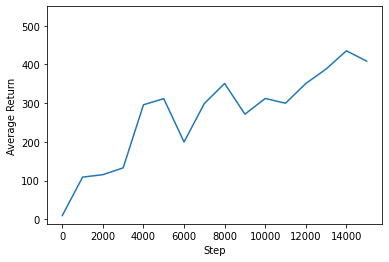

In [11]:
#@test {"skip": true}

steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=550)

### 비디오

각 스텝에서 환경을 렌더링하여 에이전트의 성능을 시각화하면 도움이 됩니다. 이를 수행하기 전에 먼저 이 Colab에 비디오를 포함하는 함수를 작성하겠습니다.

In [12]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

다음 코드는 몇 가지 에피소드에 대한 에이전트 정책을 시각화합니다.

In [13]:
num_episodes = 3
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)

C51은 CartPole-v1에서 DQN보다 약간 더 나은 경향이 있지만, 점차 더 복잡해지는 환경에서는 두 에이전트 간의 차이가 점점 더 중요해집니다. 예를 들어, 전체 Atari 2600 벤치마크에서 C51은 무작위 에이전트에 대해 정규화한 후 DQN에 비해 126%의 평균 점수가 개선됨을 보여줍니다. n-step 업데이트를 포함하여 추가로 개선할 수 있습니다.

C51 알고리즘에 대한 자세한 내용 [강화 학습에 대한 분포적 관점(2017)](https://arxiv.org/pdf/1707.06887.pdf)을 참조하세요.